# **ENGS 108 Fall 2023 Assignment 2**

*Due TBD at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Ganesh Rohit Nirogi, Diksha Bubna, Sunishka Jain, Kushagra Rawat


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from scipy import signal
import matplotlib.collections as collections




# **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/Thayer-ENGS108/Assignment_2_Fall2022) for how to get setup.

In [5]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours.
dataset_base_path = '/content/drive/MyDrive/Assignment2_DataSets'

In [6]:

#-- Everything else you should not need to change.
import os
import pickle

#-- Gather paths
synth_data_path = os.path.join(dataset_base_path, 'assign_2_synth_data.pk')
red_train_path = os.path.join(dataset_base_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_base_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_base_path, 'red_test.csv')
synth_train_path = os.path.join(dataset_base_path, 'synth_train.csv')
synth_valid_path = os.path.join(dataset_base_path, 'synth_valid.csv')
synth_test_path = os.path.join(dataset_base_path, 'synth_test.csv')

#-- Load Synth_Data
with open(synth_data_path, 'rb') as f_:
  synth_data = pickle.load(f_)

#-- Load Red Wine Data
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)
synth_train_df = pd.read_csv(synth_train_path)
synth_valid_df = pd.read_csv(synth_valid_path)
synth_test_df = pd.read_csv(synth_test_path)

#-- Data is stored in a tuple of format (X, y) and are already converted to numpy arrays.
red_train = (red_train_df.drop('quality', axis=1).to_numpy(), red_train_df['quality'].to_numpy())
red_valid = (red_valid_df.drop('quality', axis=1).to_numpy(), red_valid_df['quality'].to_numpy())
red_test = (red_test_df.drop('quality', axis=1).to_numpy(), red_test_df['quality'].to_numpy())

#-- Load in Synth train, valid, test data with tuple format (X, y)
synth_train = (synth_train_df.drop('y', axis=1).to_numpy(), synth_train_df['y'].to_numpy())
synth_valid = (synth_valid_df.drop('y', axis=1).to_numpy(), synth_valid_df['y'].to_numpy())
synth_test = (synth_test_df.drop('y', axis=1).to_numpy(), synth_test_df['y'].to_numpy())

## **Problem 1: $K$-Means Clustering**
In this problem, you will solve a clustering
task using the k-means algorithm and an associated classification task using $k$ nearest neighbors algorithm, both of which you learned in class. The dataset for this problem is a synthetic two-dimensional dataset *synth_data*. Each entry has two features $(x_1, x_2)$.
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Choose a suitable type of plot and visualize the training data.

In [18]:
type(synth_data)

numpy.ndarray

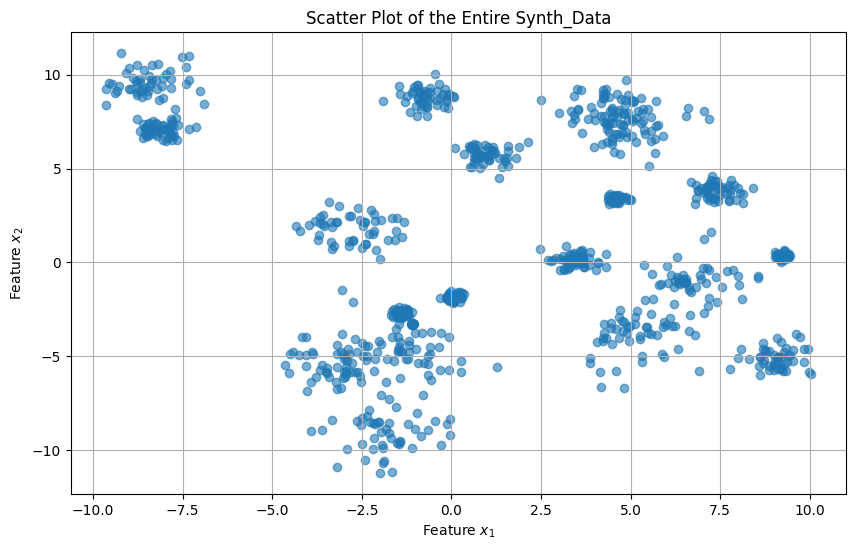

In [21]:
#TODO: Write your code here. Use matplotlib for visualization.
X = synth_data
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)  # As there is no target mentioned, plotting all points with the same color
plt.title('Scatter Plot of the Entire Synth_Data')
plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')
plt.grid(True)
plt.show()

>> **(b)** From your plot, how many clusters, $k$, would you estimate are represented in the dataset?

**TODO:** *Type your answer in Markdown here.*

I would estimate there to be 3 clusters based on the dataset.

> **Part 2** Build a model.
>> **(a)** Using the k-Means algorithm, implement a clustering model. *Hint: Use [scikit-learn's K-means library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).*

In [29]:
#TODO: Write your code here. Hint: Just define a model, don't train yet.
from sklearn.cluster import KMeans

# Define the K-Means model with 3 clusters
kmeans_model = KMeans(n_clusters=3, random_state=42)


>> **(b)** Train the clustering model on several reasonable values of $k$, taking into account your visual inspection from 1b. Plot the sum of distance (SSE) from each data point and its respective cluster for 10 different values of $k$.

In [30]:
def train(k, dataset):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(dataset)
    return model

In [31]:
train(1,X)
train(2, X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [32]:
def calculateSSE(model):
    """Calculates the SSE for the trained model"""

    # Extracting the SSE from the model's inertia_ attribute
    sse = model.inertia_

    return sse


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

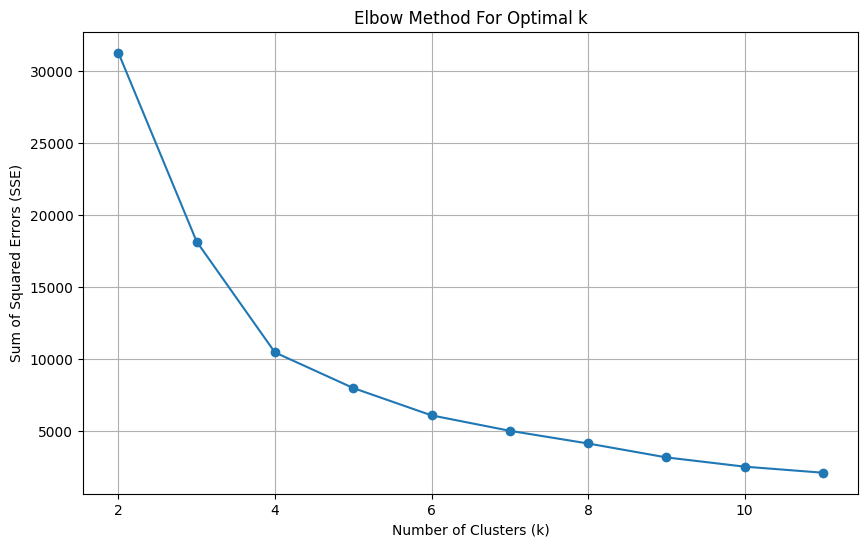

In [33]:
#TODO: Choose 10 different values of k based on your inspection and plot the SSE scores.

def plot_sse_for_k_values(dataset):
    k_values = range(2, 12)  # k from 2 to 11
    sse_values = []  # to store sum of squared errors for different k values

    for k in k_values:
        # Train the model using the 'train' function
        model = train(k, dataset)

        # Calculate SSE using the 'calculateSSE' function
        sse = calculateSSE(model)

        # Append the calculated SSE to the list
        sse_values.append(sse)

    # Plotting SSE values for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse_values, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid(True)
    plt.show()

# Assuming synth_train is your dataset, call the function as
plot_sse_for_k_values(X)


>> **(c)** What value of $k$ is optimal? How does it compare to your visual inspection?


**TODO:** *Type your answer in Markdown here.*
## 5 is the optimal value of K based on my visual inspection using elbow method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

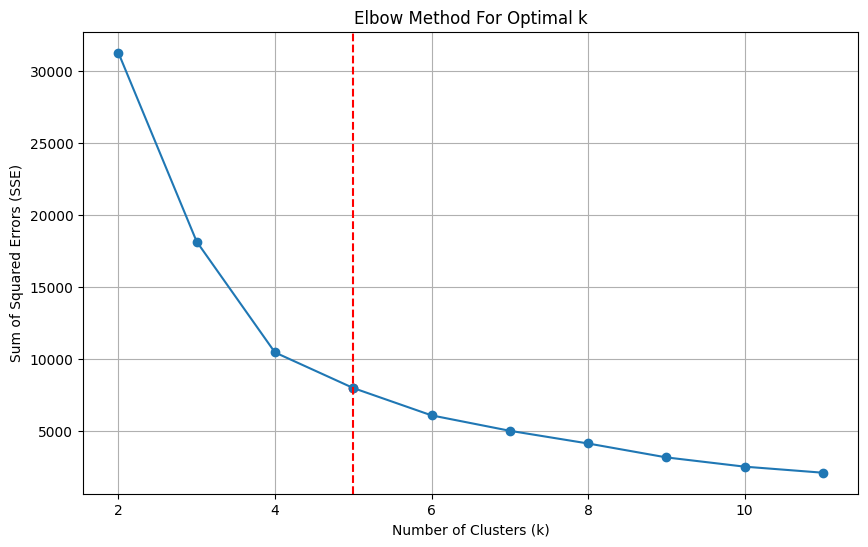

In [34]:
#TODO: Write code and plot a graph showing the optimal value of k.
def plot_sse_with_optimal_k(dataset):
    k_values = range(2, 12)  # k from 2 to 11
    sse_values = []  # to store sum of squared errors for different k values

    # Optimal k value according to elbow method
    optimal_k = 5

    for k in k_values:
        # Train the model using the 'train' function
        model = train(k, dataset)

        # Calculate SSE using the 'calculateSSE' function
        sse = calculateSSE(model)

        # Append the calculated SSE to the list
        sse_values.append(sse)

    # Plotting SSE values for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse_values, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')

    # Highlighting the optimal value of k
    plt.axvline(x=optimal_k, color='r', linestyle='--')
    plt.scatter(optimal_k, sse_values[optimal_k - 2], color='red')

    plt.grid(True)
    plt.show()

# Assuming synth_train is your dataset, call the function as
plot_sse_with_optimal_k(X)


# **Problem 2: $k$-NN Classification**
In this problem, you will utilize data deriving
from the same synthetic dataset as above. This time, the data has been separated into *synth_train*, *synth_valid* and *synth_test* arrays. Furthermore, each sample now includes a class label found in the $y$ column. These class labels come from the set $\{1, 2, . . . , 31\}$. *Note: These are not the same datasets as Problem 1.*

> **Part 1** Train an implementation of the $k$-Nearest Neighbors algorithm on the training dataset. Note that $k$ here refers to the number of neighbors, not clusters.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

def train(k, dataset):
    ''' Implement a function that will train a k-NN
    for different values of k on your dataset and return the trained model'''

    X, y = dataset  # Extracting features and labels from the dataset
    model = KNeighborsClassifier(n_neighbors=k)  # Initialize the model with k neighbors
    model.fit(X, y)  # Train the model on the dataset
    return model  # Return the trained model


In [41]:
k = 3  # or any other value you want to try
trained_model = train(k, synth_train)  # Assuming synth_train is a tuple (X, y)


> **Part 2** Report the classification accuracy of this model on the validation set for different values for $k$. Plot these accuracies against $k$ and report the optimal value for $k$.

In [45]:
#TODO: Write your code here.
from sklearn.metrics import accuracy_score
def calculate_accuracy(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    return accuracy_score(y_valid, y_pred)


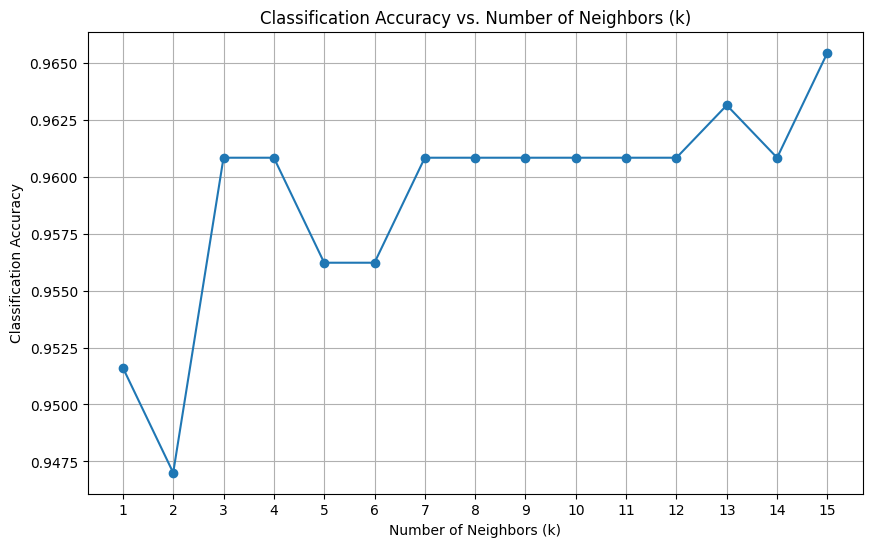

The optimal value for k is 15 with accuracy of 96.54%


In [46]:
X_valid, y_valid = synth_valid  # Assuming synth_valid is a tuple (X, y)

k_values = list(range(1, 16))  # You can choose a different range for k based on your requirement
accuracies = []

# Loop through different k values
for k in k_values:
    model = train(k, synth_train)  # Train the model with the current k
    accuracy = calculate_accuracy(model, X_valid, y_valid)  # Calculate accuracy on the validation set
    accuracies.append(accuracy)  # Store the accuracy

# Find the optimal k
optimal_k = k_values[accuracies.index(max(accuracies))]

# Plotting
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Classification Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Accuracy')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid(True)
plt.show()

print(f"The optimal value for k is {optimal_k} with accuracy of {max(accuracies)*100:.2f}%")


> **Part 3** Report the classification precision, recall and F1-score of this model on the data in synth test.csv using the optimal value of $k$ that you found in Part 2.

In [47]:
#TODO: Write your code here.
optimal_k = 15
optimal_model = train(optimal_k, synth_train)
X_test, y_test = synth_test
y_pred = optimal_model.predict(X_test)
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-score: {f1*100:.2f}%")

# For detailed classification report
print(classification_report(y_test, y_pred))


Precision: 97.98%
Recall: 97.96%
F1-score: 97.95%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.96      1.00      0.98        27
           3       0.97      0.97      0.97        36
           4       0.95      0.93      0.94        40
           5       0.96      0.87      0.92        31
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        36
           8       0.95      0.90      0.92        20
           9       1.00      1.00      1.00        28
          10       0.93      0.97      0.95        29
          11       1.00      1.00      1.00        29
          12       0.97      0.97      0.97        32
          13       1.00      0.96      0.98        26
          14       1.00      1.00      1.00        20
          15       0.97      1.00      0.99        34
          16       1.00      1.00      1.00        30
          17       1.00      1.

# **Problem 3: Decision Tree Classification**
In this problem you will use decision
trees to classify the quality of red vinho verde wine samples based on their physicochemical properties. The dataset has been separated into *red_train, red_valid and red_test* arrays. For all of these files, the rightmost column (“quality”) is the target label for each datapoint. All other columns are features.

> **Part 1** First let’s explore the datasets through the following exercises. Note that we cannot plot the data in a meaningful way given that number of features exceed the physical dimensions.

>> **(a)** How many datapoints are in the training, validation, and testing sets?

In [48]:
#TODO: Write your code here.
# Extract the labels and features
X_train, y_train = red_train
X_valid, y_valid = red_valid
X_test, y_test = red_test

# Print the number of data points in each set
print(f"Number of data points in training set: {X_train.shape[0]}")
print(f"Number of data points in validation set: {X_valid.shape[0]}")
print(f"Number of data points in testing set: {X_test.shape[0]}")


Number of data points in training set: 895
Number of data points in validation set: 224
Number of data points in testing set: 480


>> **(b)** How many features are available for each datapoint?

In [49]:
#TODO: Write your code here.
# Extract the features from the training set
X_train, _ = red_train

# Print the number of features
print(f"Number of features for each data point: {X_train.shape[1]}")


Number of features for each data point: 11


>> **(c)** What are the average *alcohol* and *pH* values for *training* samples?

In [53]:
#TODO: Write your code here.
print(red_train_df.columns)
X_train, _ = red_train
avg_alcohol = np.mean(X_train[:, 8])  # replace 'a' with the correct index
avg_pH = np.mean(X_train[:, 10])  # replace 'b' with the correct index

print(f"Average Alcohol value for training samples: {avg_alcohol}")
print(f"Average pH value for training samples: {avg_pH}")

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Average Alcohol value for training samples: 3.309541899441341
Average pH value for training samples: 10.397951582867744


> **Part 2** Decision Trees.

>> **(a)** Implement a binary decision tree model for the training data. *Hint: Try looking at the [scikit-learn decision tree library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).*

In [56]:
from sklearn.tree import DecisionTreeClassifier

def train(dataset, max_depth=None):
    # Extracting features and target variable from the dataset
    X, y = dataset

    # Initializing the model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fitting the model to the training data
    model.fit(X, y)

    # Returning the trained model
    return model


DecisionTreeClassifier(max_depth=5, random_state=42)

>> **(b)** There are a number of hyperparameters that can be tuned to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are *maximum depth* of the tree or *minimum number of samples* left. Tune the *maximum depth* of the tree by reporting the accuracy of the classifier in 2a on the validation set for different settings of *maximum depth*. Plot your findings.

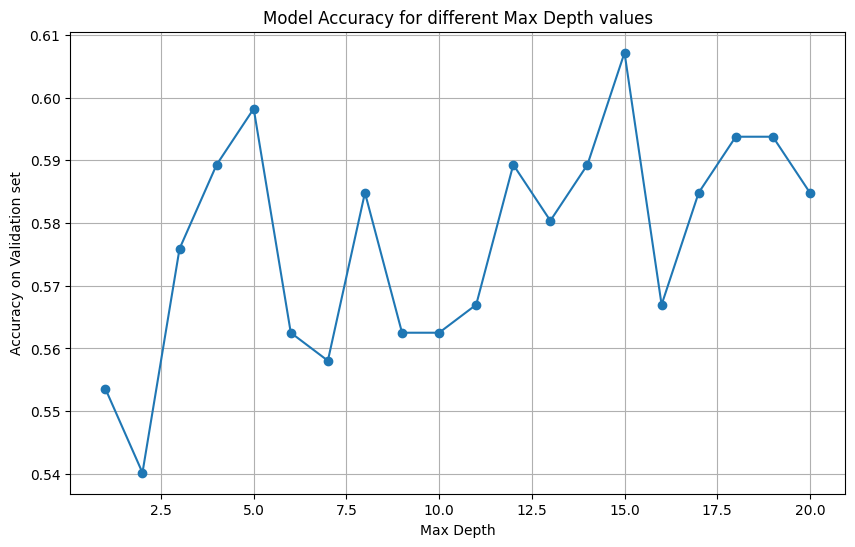

In [57]:
#TODO: Write your code here and plot your results.
max_depths = list(range(1, 21))  # example: evaluating max_depth from 1 to 20
#training the model for each maximum depth va;ue and evaluating it on the validation set
from sklearn.metrics import accuracy_score

accuracies = []  # to store accuracy for each max_depth value

for max_depth in max_depths:
    model = train(red_train, max_depth=max_depth)  # train the model with the current max_depth

    # assuming red_valid is in the form (X_valid, y_valid)
    X_valid, y_valid = red_valid

    # Predict the validation set
    predictions = model.predict(X_valid)

    # calculate and store the accuracy
    accuracy = accuracy_score(y_valid, predictions)
    accuracies.append(accuracy)
#plotting the accuracies against maximum depth values


plt.figure(figsize=(10,6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Model Accuracy for different Max Depth values')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy on Validation set')
plt.grid(True)
plt.show()


In [58]:
optimal_depth = max_depths[np.argmax(accuracies)]
print(f"Optimal Maximum Depth is: {optimal_depth}")


Optimal Maximum Depth is: 15


>> **(c)** Use the optimum setting of *maximum depth* found in 2b to report the accuracy of the classifier on the *test* dataset.

In [59]:
#TODO: Write
# Train the model with the optimum max_depth
final_model = train(red_train, max_depth=15)  # Using the train function defined previously
#evaluating the model on Test Dataset

# Assuming red_test is in the form (X_test, y_test)
X_test, y_test = red_test

# Make predictions on the test set
predictions = final_model.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the final model on the test dataset: {accuracy * 100:.2f}%")


Accuracy of the final model on the test dataset: 59.79%


# **Problem 4: Systems - Estimating ODE Parameters**

Many real-world systems can be modelled by linear diffferential equations. Some of the most common examples are mechanical and electrical oscillations (see mass-spring example below) which can be described by the solution of an initial value problem of the form:

$$𝑎𝑥″+𝑏𝑥′+𝑐𝑥=𝑔(𝑡)  \tag{1}$$    

, where initial condition are given by:       $𝑥(0)=𝑥0$,   $𝑥′(0)=𝑥′0$                    

For our problems, we will assume that $g(t) = 0$, no external force (for spring system etc)

![Url](https://benmoseley.blog/wp-content/uploads/2021/08/oscillator.gif)


>**Part 1** Lets generate some synthetic data using an ODE for a vibration with no damping in chapter 3.7 Example 4 (Source: Elementary Differential Equations and Boundary Value Problems by Boyce & DiPrima, Wiley 2017).
In this system, $$ x'' + 0.125x' + x= 0 \tag{2}$$
and the analytical solution is the function below:


In [72]:
t = np.linspace(0, 30*np.pi, 1000)   # time
x_funct = lambda t: (32/np.sqrt(255))*np.exp(-1*t/16)*np.cos((np.sqrt(255)/16)*t -0.06254)  # function to get x given t

# analytic function x given t
x_analytic = x_funct(t)

>> **(a)** Now lets assume we have observed a noisy sample composed of the first 20% of x_analytic. Create noisy data for the first 20% of x_analytic

In [73]:
# create t_noisy (time) to record time for the first 20% of t
NOISY_FACTOR = 5 # controls the threshold for adding noise

len_t = int(0.2*len(t))
t_noisy = t[:len_t]

In [74]:
# TODO: Compute x for the corresponding t_noisy
x = x_funct(t_noisy)


In [75]:
# TODO: adding noise
noise = np.array(np.random.random(len_t) - 0.5)/NOISY_FACTOR
x_noisy = x_noisy + noise


>>**(b)** Our task in this question is to estimate parameters a, b, and c, assuming that we only observed x_noisy

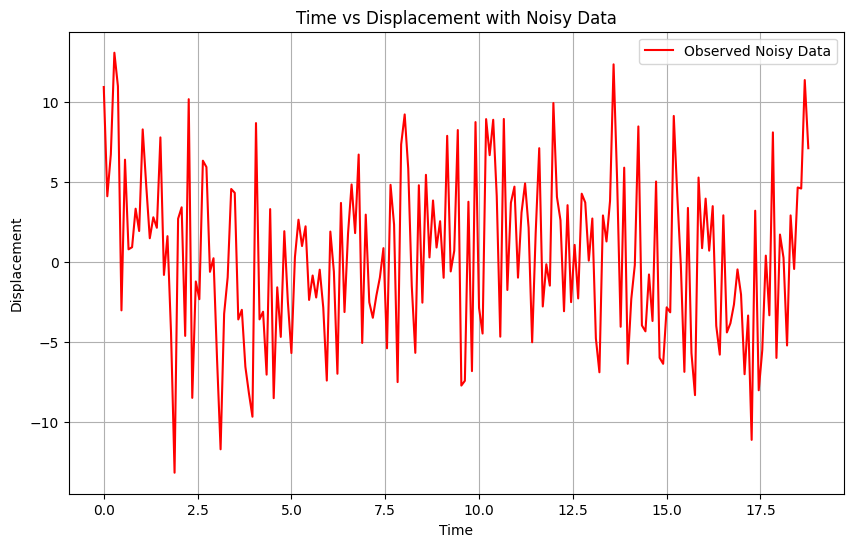

In [79]:
# TODO: Plot the observed noisy data below (time vs displacement)
plt.figure(figsize=(10,6))
plt.plot(t_noisy, x_noisy, color='red', label='Observed Noisy Data')
plt.title('Time vs Displacement with Noisy Data')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)
plt.show()


>> **(c)** Real-world data is often noisy and denoising can help to reduce the noise. Denoise the above data to create x_denoised:

In [78]:
# denoising
N, Wn = 5, 0.03   # Feel free to modify N and Wn as you see fit!
b, a = signal.butter(N, Wn, analog=False)   # module from scipy
x_denoised = signal.filtfilt(b,a,x_noisy)

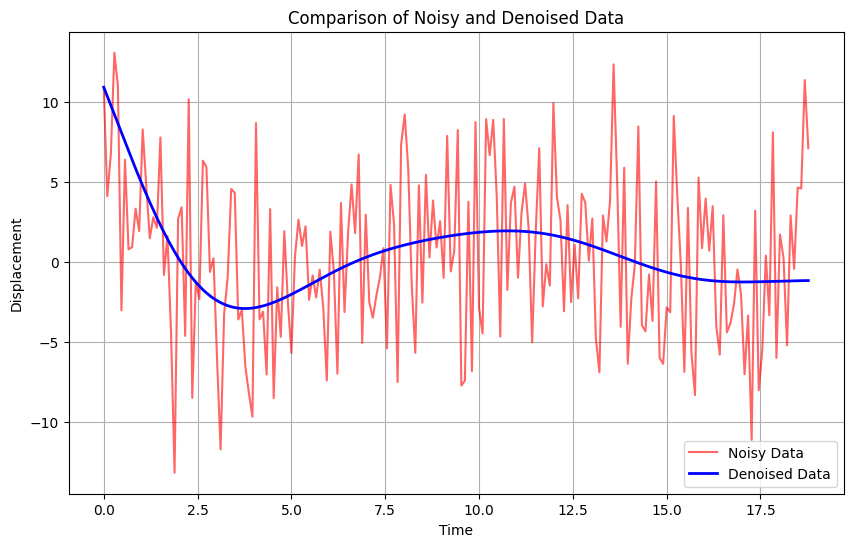

In [81]:
# TODO: Plot and insert legend to differentiate x_noisy and x_denoised vs time (on same plot)
plt.figure(figsize=(10,6))

# plot for noisy data
plt.plot(t_noisy, x_noisy, color='red', alpha=0.6, label='Noisy Data')

# Line plot for denoised data
plt.plot(t_noisy, x_denoised, color='blue', linewidth=2, label='Denoised Data')

# Title and labels
plt.title('Comparison of Noisy and Denoised Data')
plt.xlabel('Time')
plt.ylabel('Displacement')

# Showing legend to differentiate between noisy and denoised data
plt.legend()

# Grid for better readability
plt.grid(True)

# Display the plot
plt.show()


**Part 2**: Compute derivatives x' and x'' to estimate a, b, and c given x

>>**a** Using the ([forward method (finite difference)](https://en.wikipedia.org/wiki/Finite_difference)).
compute $x'$ and $x''$ for both x_noisy and x_denoised

In [96]:
#TODO: Complete the function below
def first_derivative(X, dt):
    # approximate derivative using forward nethod
    first_derivative = np.diff(X) / dt
    return first_derivative

In [97]:
#TODO: Complete the functions below
def second_derivative(X_first, dt):
    # Basically differentiate the first derivative
    second_derivative = np.diff(X_first) / dt
    return second_derivative

In [98]:
def get_derivatives (X):
    dt = t[1] - t[0] # time difference
    X_prime =  first_derivative(deepcopy(X), dt)
    X_prime_squared = second_derivative(deepcopy(X_prime), dt)
    # adjust to make equal lengths arrays
    return X[2:], X_prime[1:], X_prime_squared


# for noisy data
x, x_prime, x_prime_squared = get_derivatives(x_noisy)

# for denoised data
x1, x_prime1, x_prime_squared1 = get_derivatives(x_denoised)

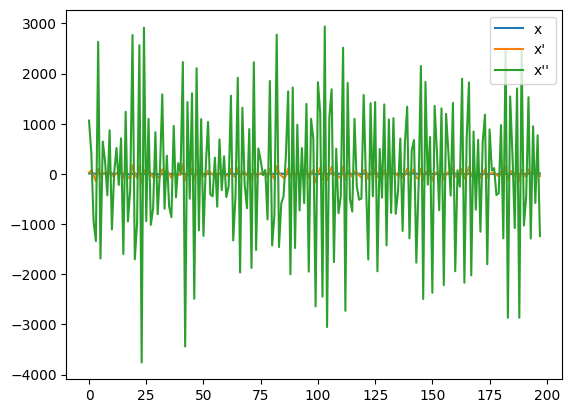

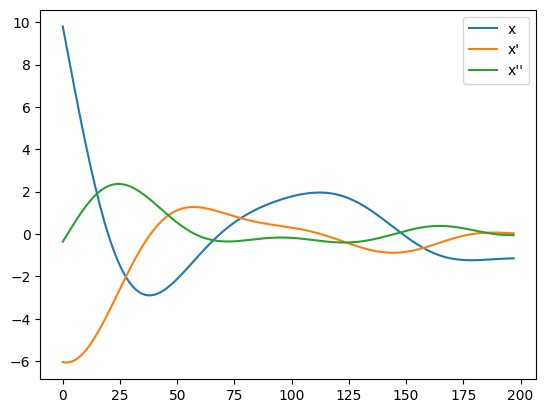

In [100]:
# TO DO: Fill the function belwo

def plot_figs(x, x_first, x_second):
    plt.plot(x, label='x')
    plt.plot(x_first, label="x'")
    plt.plot(x_second, label="x''")
    plt.legend(loc='upper right')
    plt.show()


plot_figs(x, x_prime, x_prime_squared)
plot_figs(x1, x_prime1, x_prime_squared1)

>>**(b)** How do the derivative plots compare for the noisy vs the denoised samples? Whats the effect of denoising? What happens when we adjust the NOISY_FACTOR (see Part 1a)?

In [ ]:
# TODO: Your answer in Markdown


# denoised samples are smoother. If we adjust the noisy_factor, the smoothness becomes better


>>**(c)** Now we have x, x' and x''. Since g(t) = 0; we can estimate a, b, and c via regression. If we assume c = 1,
then Equation 1 can be written as:
    
    
$$𝑎𝑥″+𝑏𝑥′ =  -x \tag{3}$$


>>>From Equation 3, we can perform [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate parameters a and b. Using -x as your dependent variable, and x' and x'' as your independent variables. Train a regression model below:




In [104]:
#TODO: Fill the function below

def train_model (X, X_first, X_second):
    """ X - original x, X_first - first derivative, X_second - second derivative """

    # TODO: Using Equation 3 with independent variable, (X'' and X'), dependent variable (-X).
    #       Fit a linear regression model

    # return the regression coefficients and the model (which we will be a and b)
    independent_vars = np.vstack((X_first, X_second)).T

    # Preparing dependent variable matrix
    dependent_var = -X

    # Creating a linear regression model
    model = LinearRegression(fit_intercept=False)  # Assuming no intercept as it's not mentioned

    # Fitting the model
    model.fit(independent_vars, dependent_var)

    return model.coef_

# train regression models for the noisy and denoised data
coeff_noisy  = train_model(x, x_prime, x_prime_squared)   # noisy data
coeff_denoised = train_model(x1, x_prime1, x_prime_squared1)   # denoised data

**Part 3**  From the model coefficients, we can identify parameters $a$ and $b$ and we know that $c = 1$. Now, our task is to
predict how good our model can predict the entire dataset.

In [106]:
a_noisy, b_noisy = coeff_noisy
a_denoised, b_denoised = coeff_denoised

print('For the noisy sample: (a = {}, b = {}, c = 1)'.format(a_noisy, b_noisy))
print('For the denoised sample: (a = {}, b = {}, c = 1)'.format(a_denoised, b_denoised))
print("The analytic solution has (a = 1, b = 0.125, and c = 1)")


For the noisy sample: (a = -0.09489739085727077, b = 0.002916200429805876, c = 1)
For the denoised sample: (a = 1.2555373206321259, b = 2.1381665486934227, c = 1)
The analytic solution has (a = 1, b = 0.125, and c = 1)


>>**(a)** How do estimated parameters from the noisy and denoised samples compare to the analytic parameters?

## Denoised parameters are closer to analytical solution, indidicating that denoising has brought the estimated paramters closer to the analytics ones

In [ ]:
# TODO: Your answer

>> **(b)** From Equation 3, $$x = -1*(ax'' + bx') \tag{4}$$
We will use this equation to test how good our parameters predict the analytic solution (given x' and x'').

In [107]:
# get derivatives on entire dataset
X, X_prime, X_prime_squared = get_derivatives(x_analytic)


# TODO: Use Equation 3 to compute X
def compute_x (X_first, X_second, a, b):

    X = -1 * (a * X_second + b * X_first)
    return X

# TODO: Predict Y for the noisy sample, and the denoised sample
x_pred_noisy = compute_x(X_prime, X_prime_squared, a_noisy, b_noisy)
x_pred_denoised  = compute_x(X_prime, X_prime_squared, a_denoised, b_denoised)



Text(0, 0.5, 'displacement')

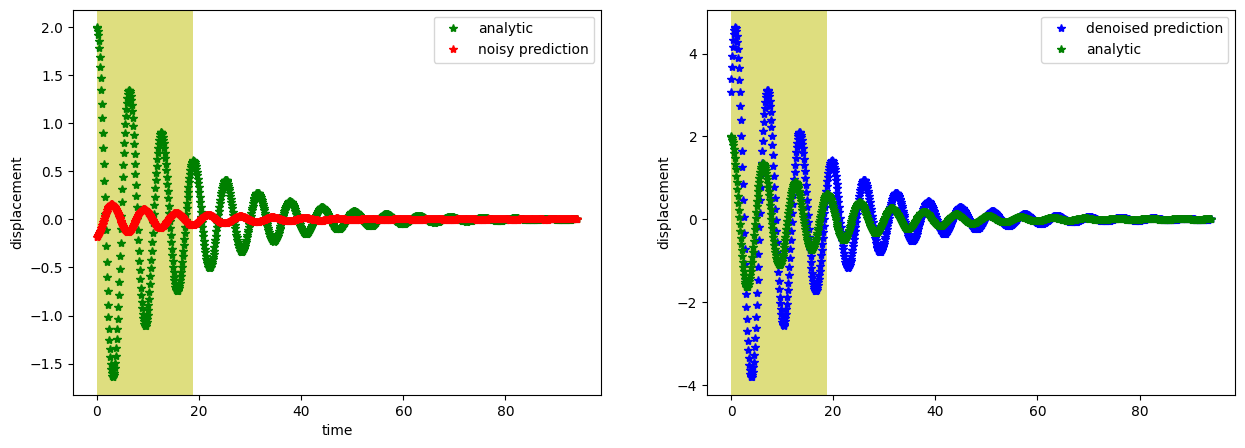

In [108]:

# adjust t to fit dimensions of predictions
LEN_T = len(t)
t_original = t[:LEN_T-2]
x_original = x_analytic[:LEN_T -2]


# Plots to show how well our parameters fit the data from the analytic solution
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
axes[0].plot(t_original, x_original, '*', color = 'green', label = 'analytic')
axes[0].plot(t_original, x_pred_noisy, '*', color = 'red', label = 'noisy prediction')

axes[1].plot(t_original, x_pred_denoised, '*', color = 'blue', label = 'denoised prediction')
axes[1].plot(t_original, x_original, '*', color = 'green', label = 'analytic')

axes[0].legend()
axes[1].legend()

# This shades the seen part (in creating the model -yellow), but the model
# extends to the unseen white part
axes[0].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)
axes[1].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)

axes[0].set_xlabel('time')
axes[0].set_ylabel('displacement')
axes[1].set_ylabel('time')
axes[1].set_ylabel('displacement')


>>**(c)** How do these two plots compare? On the same graph, plot the relative errors to compare how x_pred noisy and x_pred_denoised differ from x_original (if necessary, use a logarithmic scale). $$ RE(true, pred) =|true -pred|/|true|$$ What conclusion do you get from the relative errors?

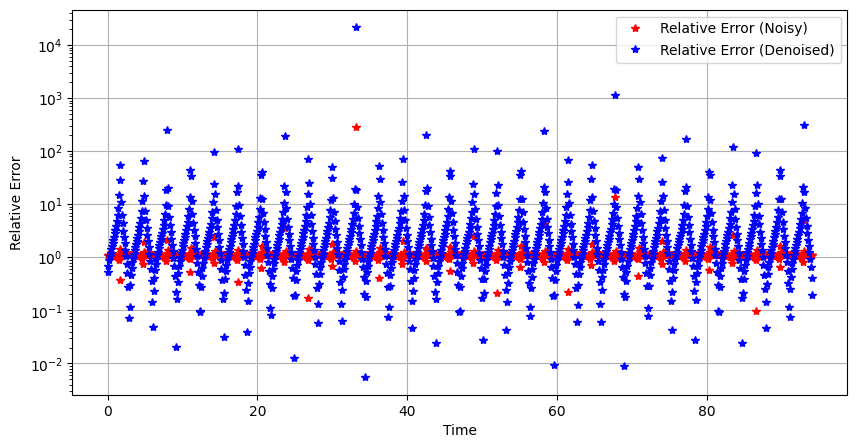

In [109]:
# Plots here
# Calculate relative errors
relative_error_noisy = np.abs(x_original - x_pred_noisy) / np.abs(x_original)
relative_error_denoised = np.abs(x_original - x_pred_denoised) / np.abs(x_original)

# Create a time array for the relative errors
t_relative_error = t_original

# Plot the relative errors
plt.figure(figsize=(10, 5))
plt.semilogy(t_relative_error, relative_error_noisy, '*', color='red', label='Relative Error (Noisy)')
plt.semilogy(t_relative_error, relative_error_denoised, '*', color='blue', label='Relative Error (Denoised)')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.legend()
plt.grid(True)
plt.show()

>>**(d)** In real-world scenarios, we often dont have x_analytic but only the noisy sample. How would you ensure if
the parameters you obtained are good enough if you only have x_noisy?

In [ ]:
# Answer here

By Cross-Validation, residual analysis, visual inspection and boostrap resampling